In [1]:
# PART-1: Load test images and dummy fugitive database
import matplotlib.pyplot as plt
from deepface import DeepFace
import cv2
import os

sample_test = [f"./Deepface/test images/{img}" for img in os.listdir("./Deepface/test images")]
image_database = [f"./Deepface/database/{img}" for img in os.listdir("./Deepface/database")]

# PART-2: Define all functions to wrap up the deepface api to detect match between two people and
# detect persons age range and gender
def getPersonInfo(path):
    obj = DeepFace.analyze(img_path = path, actions = ['age', 'gender'])
    print(f"Age is around {obj['age']} and It is a {obj['gender']}")
    
def checkIfMatch(img1, img2):
    resp = DeepFace.verify(
        img1_path=img1, 
        img2_path=img2, 
        model_name='Facenet'
    )
        
    plt.axis('off')
    img1, img2 = cv2.imread(img1), cv2.imread(img2)
    img1, img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB), cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, 1)
    plt.imshow(img1);
    plt.subplot(2, 2, 2)
    plt.imshow(img2);
    
    plt.show()
    
    if resp["verified"] == True:
        print("Same Person")
    else:
        print("Different People")
    print()
    print()
    print()
    print()
    
def RunFullAnalysis(image_no):
    test = sample_test[image_no-1]
    print("Suspect:")
    plt.imshow(cv2.cvtColor(cv2.imread(test), cv2.COLOR_BGR2RGB));
    plt.show()
    print()
    print()
    print()
    print("Running Face Check on Sample Database...")
    print()
    for img in image_database:
        checkIfMatch(test, img)
    print()
    print()
    print("Running Analysis on Suspect's Face")
    getPersonInfo(test)

Suspect:


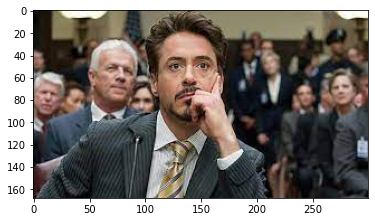




Running Face Check on Sample Database...



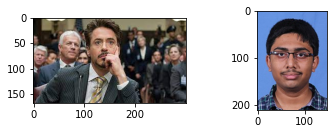

Different People






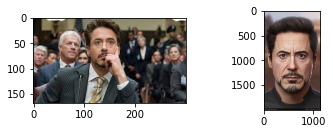

Same Person






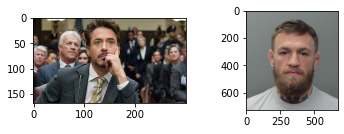

Different People






Running Analysis on Suspect's Face


Action: gender: 100%|████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.42s/it]

Age is around 30 and It is a Man


In [3]:
RunFullAnalysis(1)